DATA ANALYTICS FINAL PROJECT 

TOPIC : An Exploratory Data Analysis of the Census Income Dataset

SOURCE: kaggle.com

PROBLEM DEFINITION

Income levels are shaped by a complex interaction of demographic and employment-related factors such as age, education, workclass, occupation, working hours, and gender. Using the Census Income dataset, this project investigates how these variables influence income categories (≤50K or >50K). In particular, the analysis focuses on exploring age distribution across workclasses, average working hours by education level, and the relationship between workclass and age. By combining exploratory data analysis with predictive insights, the project seeks to identify the most important drivers of higher income and uncover meaningful socioeconomic patterns that explain income disparities.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the selected dataset to a dataframe variable:

In [15]:
df = pd.read_csv(r'C:\Users\josep\Downloads\census-income_ (1).csv\census-income_ (1).csv')

In [16]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


A Proper Initial Overview of the loaded Dataset:

  Firstly using 'df.shape()' function to check out the number of Rows and columns:

In [17]:
print('Number of Rows and Columns: ', df.shape)

Number of Rows and Columns:  (32561, 15)


Here There are 32561 rows and 15 columns in the dataset

To have a preview of the dataset, loading the first 15 rows using 'df.head()' function

In [18]:
df.head(16)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Here we have seen the complete data and also we can see the 15th column heading is missing. we will figure out if there is any other missing values or something and will do it later on 

To get a sense of the datatypes of the columns, use 'df.info()' function

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14                   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Here we can see that capital gain and capital loss are financial data and its data type to be changed to float which we will deal later on 

Using 'df.describe' function to summarize the descriptive statistics of the numerical values of the dataset

In [20]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Now we got a quick sense of the dataset through statistical analysis which included count, mean, standard deviation etc.

DATA CLEANING & PRE-PROCESSING 

Checking for the total number of duplicates using 'df.duplicated.sum()' function

In [21]:
df.duplicated().sum()

24

There are 24 duplicated datas are in this dataset 

to find and display duplicate rows in the data set we use df[df.duplicated()].head() 
This shows the first 5 duplicate rows, instead of printing all duplicates

In [22]:
df[df.duplicated()].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


To removes every row that is an exact duplicate of a previous one we use df=df.drop_duplicates() 

In [30]:
df= df.drop_duplicates()

 To reassigns the row numbers (0,1,2,...) for the data frame to look like clean after deletion we use reset_index(drop=True)so that the  DataFrame looks clean after deletion

In [32]:
df = df.reset_index(drop=True)

In [33]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


To check the column names and identify the missing column name we will use print(df.columns.tolist())

In [35]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' '],
      dtype='object')

Here we can see the last column which is blank to be renamed as Income. so to rename the column as Income

In [37]:
columns = [
    'age', 
    'workclass', 
    'fnlwgt', 
    'education', 
    'education_num', 
    'marital_status',
    'occupation', 
    'relationship', 
    'race', 
    'gender', 
    'capital_gain', 
    'capital_loss',
    'hours_per_week', 
    'native_country', 
    'income'
]

To rename all the columns of your DataFrame at once we will use df.columns = columns

In [38]:
df.columns = columns

In [39]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


CORRECTING THE DATA TYPE

Changing financial values from 'int' to 'float' datatype using 'astype()' method in capital gain and capital loss to ensure accurate calculations and allow decimal precision in the future

In [41]:
df['capital_gain'] = df['capital_gain'].astype(float)

In [42]:
df['capital_loss'] = df['capital_loss'].astype(float)

Checking the datatypes again using 'df.info'

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  int64  
 1   workclass       32537 non-null  object 
 2   fnlwgt          32537 non-null  int64  
 3   education       32537 non-null  object 
 4   education_num   32537 non-null  int64  
 5   marital_status  32537 non-null  object 
 6   occupation      32537 non-null  object 
 7   relationship    32537 non-null  object 
 8   race            32537 non-null  object 
 9   gender          32537 non-null  object 
 10  capital_gain    32537 non-null  float64
 11  capital_loss    32537 non-null  float64
 12  hours_per_week  32537 non-null  int64  
 13  native_country  32537 non-null  object 
 14  income          32537 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


Datatypes changed successfully!

CREATING DERIVED COLUMNS

Creating a new column named net capital as the difference between capital-gain and capital-loss

In [45]:
df['net_capital'] = df['capital_gain'] - df['capital_loss']

In [46]:
df['net_capital']

0         2174.0
1            0.0
2            0.0
3            0.0
4            0.0
          ...   
32532        0.0
32533        0.0
32534        0.0
32535        0.0
32536    15024.0
Name: net_capital, Length: 32537, dtype: float64

The newly derived 'net_capital' column helps in understanding the net capital of each individuals

FILTERING THE DATA 

Filtering out the individuals who work in the private sector.

In [47]:
private_workers = df[df['workclass'] == 'Private']

In [48]:
print(private_workers[['age', 'workclass', 'education']].head())

Empty DataFrame
Columns: [age, workclass, education]
Index: []


As we got an empty data frame it seems column values have extra spaces or slightly different text than expected.

So that for every value in the workclass column, we remove any spaces at the start or end using .str.strip() to ensure the text is clean and matches exactly when we filter or compare values.

In [50]:
df['workclass'] = df['workclass'].str.strip()

In [51]:
private_workers = df[df['workclass'] == 'Private']

In [52]:
print(private_workers[['age', 'workclass', 'education']].head())

   age workclass   education
2   38   Private     HS-grad
3   53   Private        11th
4   28   Private   Bachelors
5   37   Private     Masters
6   49   Private         9th


Filtering young married individuals (<30 years old).

In [53]:
young_married = df[(df['marital_status'] == 'Married-civ-spouse') & (df['age'] < 30)]

In [55]:
print(young_married[['age', 'marital_status', 'education']].head())

Empty DataFrame
Columns: [age, marital_status, education]
Index: []


As here also we encountered the same problem as of the last case we remove any spaces at the start or end using .str.strip() to ensure the text is clean and matches exactly when we filter or compare values.

In [56]:
df['marital_status'] = df['marital_status'].str.strip()

In [57]:
young_married = df[(df['marital_status'] == 'Married-civ-spouse') & (df['age'] < 30)]

In [58]:
print(young_married[['age', 'marital_status', 'education']].head())

    age      marital_status      education
4    28  Married-civ-spouse      Bachelors
34   22  Married-civ-spouse   Some-college
42   24  Married-civ-spouse      Bachelors
50   25  Married-civ-spouse   Some-college
72   29  Married-civ-spouse      Bachelors


So we have identified the Married-civ-spouse <30 years old and their education qualification

VISUALISATIONS 

1. BAR CHART 


Using a bar horizontal bar chart  to examine how the average number of hours worked per week varies across different workclass categories. Understanding workload differences between employment sectors provides insights into labor distribution and potential income disparities.

Grouping the data by the work class and their hours per week

In [59]:
workclass_hours = df.groupby("workclass")["hours_per_week"].mean().sort_values()

In [60]:
workclass_hours

workclass
Never-worked        28.428571
?                   31.919390
Without-pay         32.714286
State-gov           39.031587
Private             40.271027
Local-gov           40.982800
Federal-gov         41.379167
Self-emp-not-inc    44.423622
Self-emp-inc        48.818100
Name: hours_per_week, dtype: float64

Plotting the horizontal bar chart

As we see a ? in the Work class we are changing it to as Unknown 

In [70]:
df['workclass'] = df['workclass'].replace('?', 'Unknown')

Varifying the change

In [71]:
print(df['workclass'].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked']


Grouping the data again by the work class and their hours per week for the rectification to be effected in the graph

In [75]:
workclass_hours = df.groupby("workclass")["hours_per_week"].mean().sort_values()

In [76]:
workclass_hours

workclass
Never-worked        28.428571
Unknown             31.919390
Without-pay         32.714286
State-gov           39.031587
Private             40.271027
Local-gov           40.982800
Federal-gov         41.379167
Self-emp-not-inc    44.423622
Self-emp-inc        48.818100
Name: hours_per_week, dtype: float64

C:\Users\josep\AppData\Local\Temp\ipykernel_13584\4085952032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workclass_hours.values, y=workclass_hours.index, palette="coolwarm")


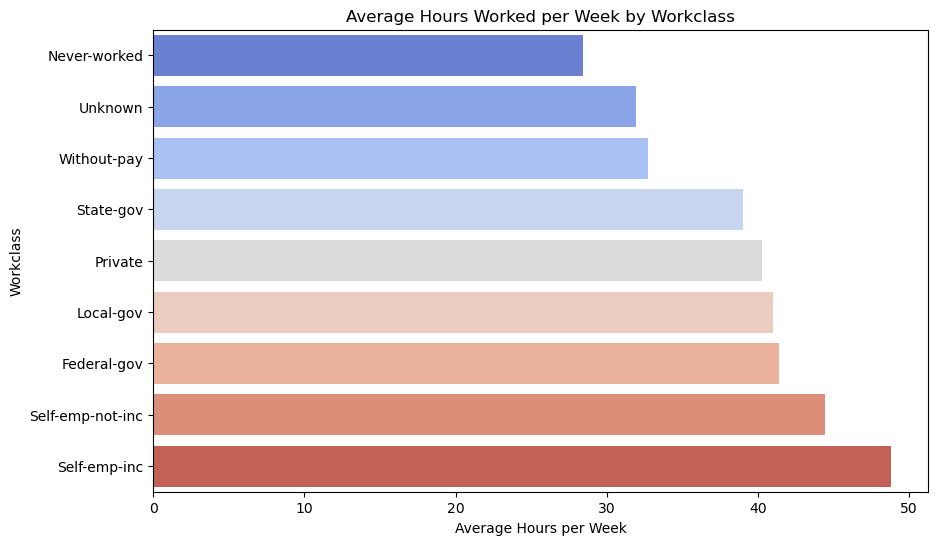

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(x=workclass_hours.values, y=workclass_hours.index, palette="coolwarm")
plt.title("Average Hours Worked per Week by Workclass")
plt.xlabel("Average Hours per Week")
plt.ylabel("Workclass")
plt.show()

INTERPRETATIONS

This bar chart displays the average hours worked per week across different work classes.

The 'Self-emp-inc' (Self-employed incorporated) group had the highest average weekly working hours, close to 50 hours per week.

The 'Never-worked' group recorded the least average working hours, less than 30 hours per week.

Other major categories such as Private, Federal-gov, Local-gov, and Self-emp-not-inc consistently worked around 40–45 hours per week.

Without-pay and Unknown (?) categories show lower working hours (~32 hours/week), falling behind both government and private sector employees.

INSIGHTS

The analysis indicates that self-employed incorporated workers spend the most hours per week, suggesting the high workload and responsibility of managing their own businesses.

Government and private employees work a typical full-time schedule (~40 hours), reflecting a relatively stable and structured work environment.

On the other hand, workers without pay and those in undefined categories put in fewer hours, possibly due to irregular work patterns or part-time arrangements.

The 'Never-worked' group naturally reflects the least working hours, signifying that this category consists of individuals outside the labour force 

This gap highlights a broader trend: entrepreneurship demands more working time, while salaried employment ensures standardised working hours and informal/unpaid sectors struggle with fewer opportunities.

2. PIE CHART

In [78]:
workclass_counts = df.groupby('workclass')['age'].count()

In [79]:
workclass_counts

workclass
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22673
Self-emp-inc         1116
Self-emp-not-inc     2540
State-gov            1298
Unknown              1836
Without-pay            14
Name: age, dtype: int64

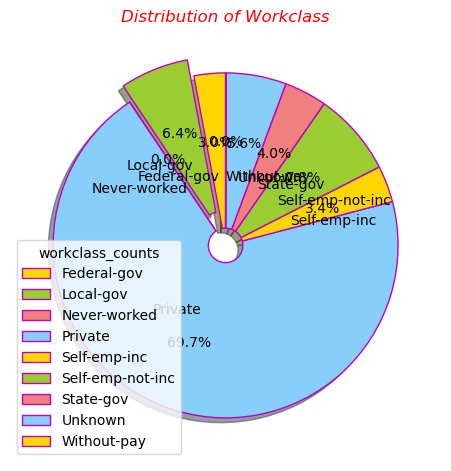

In [83]:
plt.figure(figsize=(5.6,5.6))

num_categories = len(workclass_counts)

explode = tuple([0.1 if i == 1 else 0.0 for i in range(num_categories)])

plt.pie(workclass_counts, labels = workclass_counts.index, 
autopct = '%1.1f%%', wedgeprops = {'width':0.9, 'edgecolor': 'm'}, startangle = 90, 
explode = explode,
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'], shadow = True, labeldistance = 0.4)
plt.legend(loc = 'best', title = 'workclass_counts')
plt.title('Distribution of Workclass', color = 'red', style = 'italic')
plt.show()

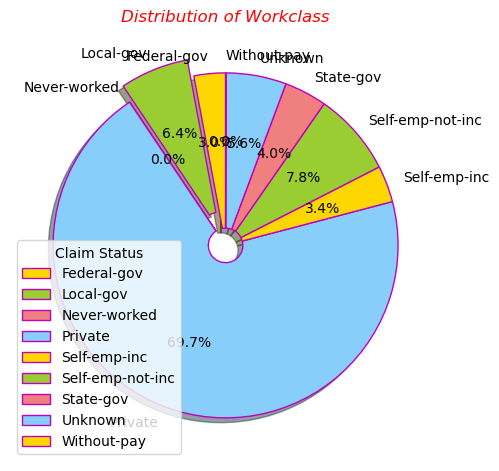

In [85]:
plt.figure(figsize=(5.6,5.6))
num_categories = len(workclass_counts)
explode = tuple([0.1 if i == 1 else 0.0 for i in range(num_categories)])

plt.pie(workclass_counts, 
labels = workclass_counts.index,
autopct = '%1.1f%%', 
wedgeprops = {'width':0.9, 'edgecolor': 'm'}, 
startangle = 90, 
explode = explode,
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'], 
shadow = True, 
labeldistance = 1.1,
pctdistance = 0.6)
plt.legend(loc = 'best', title = 'Claim Status')
plt.title('Distribution of Workclass', color = 'red', style = 'italic')
plt.show()

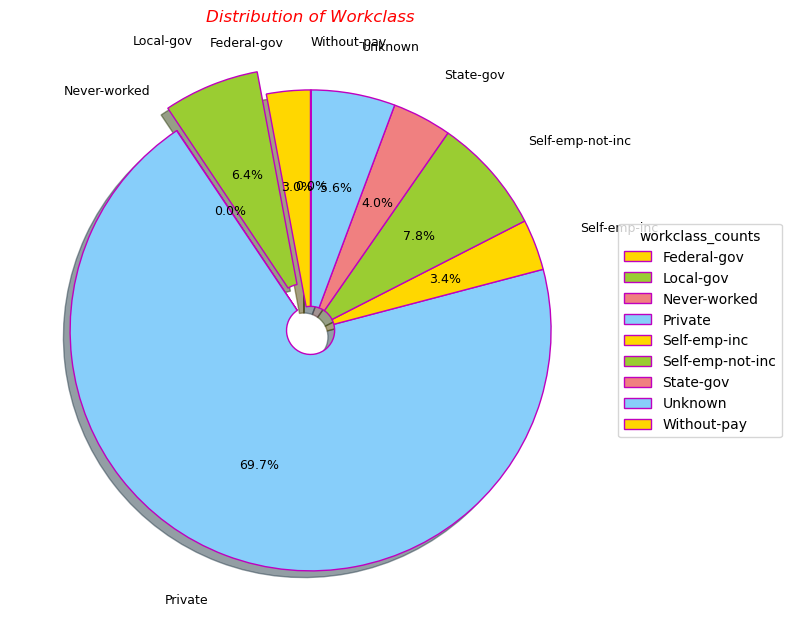

In [87]:
plt.figure(figsize=(8, 8))
num_categories = len(workclass_counts)
explode = tuple([0.1 if i == 1 else 0.0 for i in range(num_categories)])
plt.pie(workclass_counts, 
labels = workclass_counts.index,  
autopct = '%1.1f%%',              
wedgeprops = {'width':0.9, 'edgecolor': 'm'}, 
startangle = 90, 
explode = explode,
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'], 
shadow = True, 
labeldistance = 1.2, 
pctdistance = 0.6,
textprops={'fontsize': 9})
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='workclass_counts')
plt.title('Distribution of Workclass', color='red', style='italic')
plt.tight_layout()
plt.show()

INTERPRETATION

The pie chart illustrates how different workclass categories are distributed in the dataset.

The sky-blue (Private) slice dominates with 69.7%, showing that the vast majority of individuals are employed in the private sector.
The yellowgreen (Self-emp-not-inc) slice represents 7.8%, indicating a notable share of self-employed people who operate without formal incorporation.
The lightgreen (Local-gov) slice accounts for 6.4%, reflecting employment with local government bodies.
The lightpink (Unknown) slice covers 5.6%, representing records where the workclass is not specified.
The lightred (State-gov) slice contributes 4.0%, while the gold (Self-emp-inc) slice shows 3.4%, suggesting a smaller group of incorporated self-employed individuals.
The violet (Federal-gov) slice makes up 3.0%, and without-pay employment is only 0.6%.
The Never-worked category is negligible at 0.0%, indicating that almost everyone has some work history.

INSIGHTS

The overwhelming dominance of private sector employment (69.7%) highlights the crucial role of private enterprises in providing jobs and shaping economic policies.

The presence of 11.2% self-employed individuals (incorporated + not incorporated) signals healthy entrepreneurial activity and the need for supportive small-business policies.

Local government employment (6.4%) surpasses both state (4.0%) and federal (3.0%) levels, which may guide workforce planning and resource allocation at the municipal level.

The 5.6% unknown category points to incomplete or ambiguous data entries, emphasizing the importance of better classification for accurate labor market insights.

With 0% never-worked, the dataset largely represents an actively engaged workforce, useful for economic and employment trend analysis.

3. LINE CHART – Average Hours Worked per Education Level

In [89]:
edu_hours = df.groupby('education')['hours_per_week'].mean().sort_values()

In [90]:
edu_hours

education
11th            33.925957
12th            35.780600
Preschool       36.380000
10th            37.052519
9th             38.044747
1st-4th         38.234940
5th-6th         38.849398
Some-college    38.868855
7th-8th         39.365891
Assoc-acdm      40.504217
HS-grad         40.574995
Assoc-voc       41.610709
Bachelors       42.614048
Masters         43.832753
Doctorate       46.973366
Prof-school     47.425347
Name: hours_per_week, dtype: float64

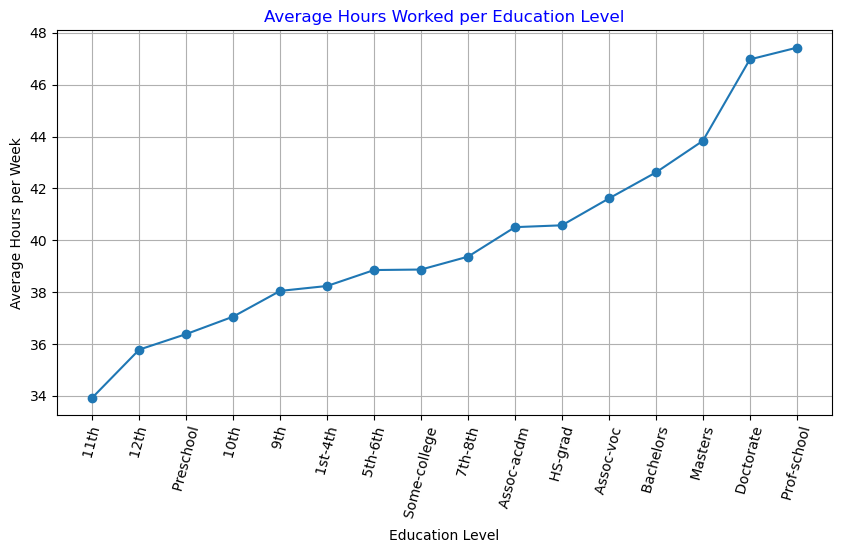

In [91]:
plt.figure(figsize=(10,5))
plt.plot(edu_hours.index, edu_hours.values, marker='o')
plt.xticks(rotation=75)
plt.title("Average Hours Worked per Education Level", color="blue")
plt.xlabel("Education Level")
plt.ylabel("Average Hours per Week")
plt.grid(True)
plt.show()

INTERPRETATION

The chart shows the average weekly hours worked across education levels.
Work hours gradually rise with higher education:

Lowest is 11th grade (34 hrs).

Moderate increase through high school, vocational, and associate degrees (38–41 hrs).

College degrees climb further, with Bachelors (42–43 hrs), Masters (44 hrs), and Doctorate (47 hrs).

Professional school tops at 47 hrs, the highest average.

INSIGHTS

Higher education generally correlates with longer work weeks, reflecting more demanding professional roles.
Advanced degrees (Masters, Doctorate, Professional) often lead to careers requiring extended commitment and responsibility.
Lower education levels correspond to fewer weekly hours, possibly due to lower-skill jobs, part-time work, or limited job opportunities.

4. COUNT PLOT – Marital Status Distribution

In [93]:
marital_counts = df.groupby('marital_status')['age'].count().reset_index(name='count')

In [94]:
marital_counts

,marital_status,count
0,Divorced,4441
1,Married-AF-spouse,23
2,Married-civ-spouse,14970
3,Married-spouse-absent,418
4,Never-married,10667
5,Separated,1025
6,Widowed,993


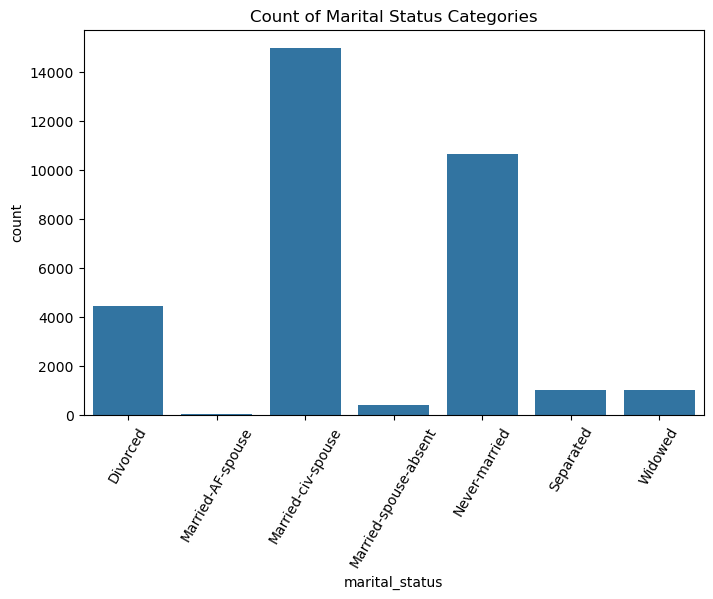

In [95]:
plt.figure(figsize=(8,5))
sns.barplot(data=marital_counts, x='marital_status', y='count')
plt.xticks(rotation=60)
plt.title("Count of Marital Status Categories")
plt.show()

INTERPRETATION

Most common marital status: Married-civ-spouse is the largest group, with around 15,000 individuals.

Second largest group: Never married (10,600) is also very significant, showing a large portion of unmarried individuals.

Moderate presence: Divorced (4,500) forms a noticeable group.

Smaller groups: Separated, Widowed, and Married-spouse-absent are much smaller (around 1,000 or less each).

Minimal category: Married AF spouse is nearly negligible.

INSIGHTS

The population is dominated by people who are either currently married (civil spouse) or never married.

Divorce is relatively common compared to separation or widowhood.

Military-related marital status (Married-AF-spouse) has very little representation.

5. SCATTER PLOT – Avg Hours vs Age (by Gender)

In [99]:
age_hours = df.groupby (['age','gender']) ['hours_per_week'].mean().reset_index()

In [100]:
age_hours

,age,gender,hours_per_week
0,17,Female,19.940860
1,17,Male,22.636364
2,18,Female,25.070896
3,18,Male,26.712766
4,19,Female,28.715493
...,...,...,...
139,87,Male,2.000000
140,88,Female,40.000000
141,88,Male,40.000000
142,90,Female,31.500000


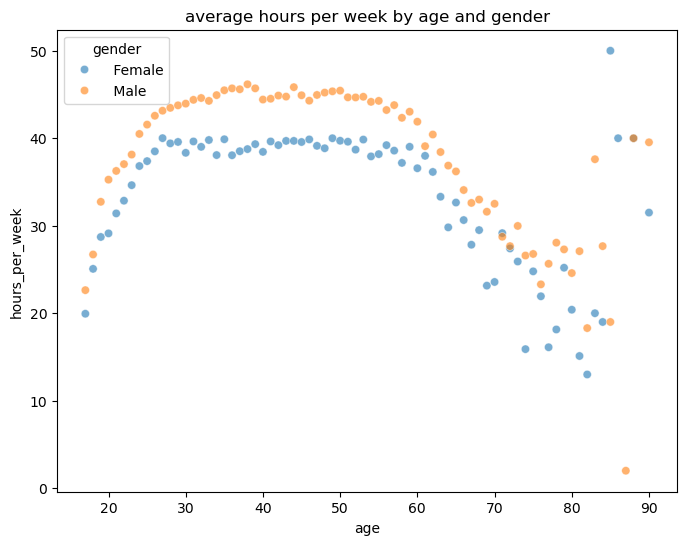

In [102]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=age_hours, x='age', y='hours_per_week', hue='gender', alpha=0.6)
plt.title("average hours per week by age and gender")
plt.show()

INTERPRETATION

Working hours rise sharply from late teens to mid-20s, then stabilize.

Males generally work more hours per week than females, especially between ages 25–60.

Peak working hours for males are around 45–50 hours/week, while females plateau around 38–40 hours/week.

After age 60, average work hours decline for both genders, showing the impact of retirement.

By the late 70s and onward, working hours drop steeply, with more variability due to fewer people in those age groups.

INSIGHTS

The data highlights a consistent gender gap in working hours, with men working longer on average during prime working years, while both groups show reduced work hours as age increases.

6. HISTOGRAM – Distribution of Age

In [111]:
age_distribution = df.groupby('age')['capital_gain'].mean()

In [112]:
age_distribution

age
17     109.691139
18     102.058182
19      92.612994
20      82.896277
21     205.194986
         ...     
85       0.000000
86       0.000000
87       0.000000
88       0.000000
90    1981.333333
Name: capital_gain, Length: 73, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

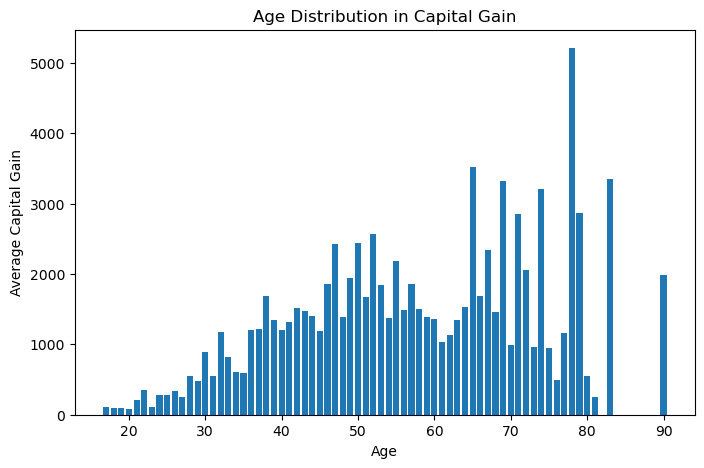

In [114]:
plt.figure(figsize=(8,5))
plt.bar(age_distribution.index, age_distribution.values)
plt.title("Age Distribution in Capital Gain")
plt.xlabel("Age")
plt.ylabel("Average Capital Gain")
plt.show

The chart illustrates a clear trend: average capital gains increase with age. Gains are minimal for those in their 20s and 30s but rise significantly through middle age. The highest capital gains are concentrated in the late 70s and early 80s, with a prominent peak around age 78.

7. HEATMAP – Correlation of Numeric Features

In [116]:
num_corr = df[['age','education_num','capital_gain','capital_loss','hours_per_week']].corr()

In [117]:
num_corr

,age,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,0.036224,0.077676,0.057745,0.068515
education_num,0.036224,1.000000,0.122664,0.079892,0.148422
capital_gain,0.077676,0.122664,1.000000,-0.031639,0.078408
capital_loss,0.057745,0.079892,-0.031639,1.000000,0.054229
hours_per_week,0.068515,0.148422,0.078408,0.054229,1.000000


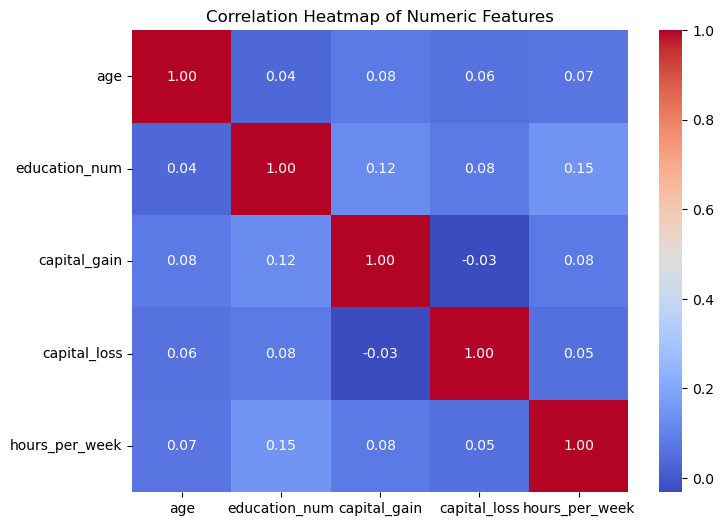

In [118]:
plt.figure(figsize=(8,6))
sns.heatmap(num_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

8. BOX PLOT – Age Distribution by Workclass

In [119]:
age_box = df.groupby('workclass')['age'].apply(list)

In [120]:
age_box

workclass
Federal-gov         [35, 30, 57, 50, 43, 32, 38, 39, 37, 41, 40, 5...
Local-gov           [56, 23, 31, 49, 34, 29, 31, 49, 47, 66, 44, 4...
Never-worked                             [18, 23, 17, 18, 20, 30, 18]
Private             [38, 53, 28, 37, 49, 31, 42, 37, 23, 32, 40, 3...
Self-emp-inc        [47, 49, 32, 56, 61, 44, 58, 54, 37, 37, 41, 5...
Self-emp-not-inc    [50, 52, 25, 43, 48, 53, 29, 48, 47, 56, 38, 4...
State-gov           [39, 30, 22, 41, 29, 46, 28, 28, 58, 37, 59, 4...
Unknown             [54, 32, 25, 67, 17, 35, 43, 52, 68, 53, 19, 6...
Without-pay         [65, 19, 21, 22, 46, 65, 52, 19, 62, 29, 72, 6...
Name: age, dtype: object

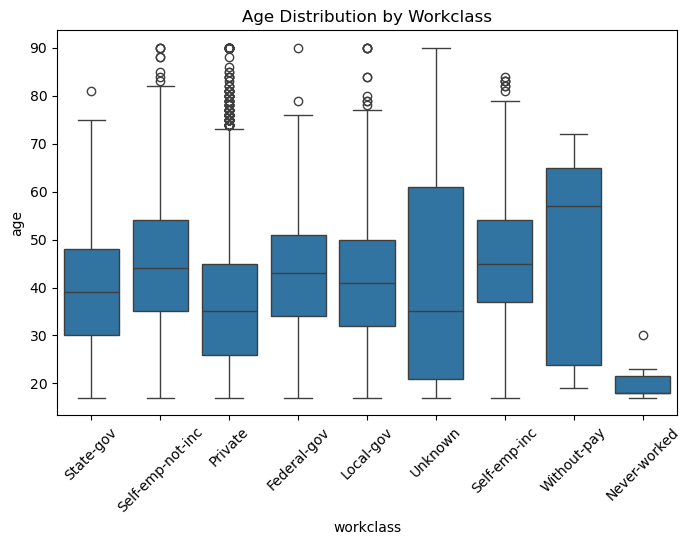

In [122]:
plt.figure(figsize=(8,5))
sns.boxplot(x='workclass', y='age', data=df)
plt.xticks(rotation=45)
plt.title("Age Distribution by Workclass")
plt.show()

This chart, which uses box plots, shows that the distribution of ages varies significantly across different work classifications. The "Never-worked" and "Without-pay" categories have the youngest median ages, suggesting these are common classifications for younger individuals. In contrast, government-related jobs ("Federal-gov," "State-gov," and "Local-gov") appear to have an older, more mature workforce with higher median ages. The "Private" and "Self-emp-not-inc" categories have a wide age distribution, with many outliers, indicating that people of all ages, including very old individuals, are employed in these sectors.

9. VIOLIN PLOT – Hours per Week by Gender

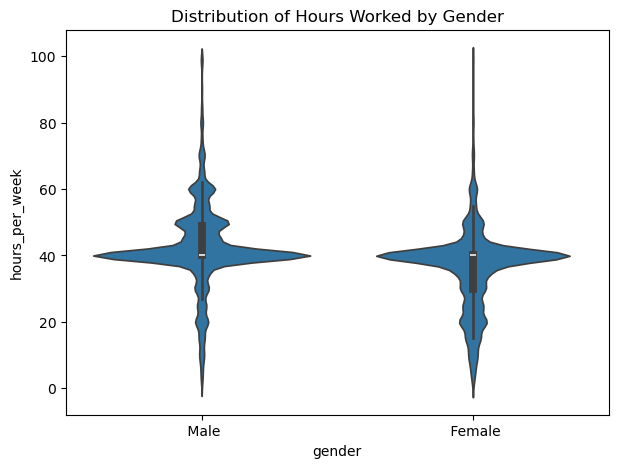

In [129]:
plt.figure(figsize=(7,5))
sns.violinplot(x='gender', y='hours_per_week', data=df)
plt.title("Distribution of Hours Worked by Gender")
plt.show()


The plot shows the distribution of hours worked per week for males and females. Both genders have a similar central tendency around 40 hours, but males exhibit a wider spread, indicating more variation in work hours. Females appear to have fewer extreme values in terms of higher work hours. The distribution for both genders is relatively symmetric.

10. BAR CHART – Avg Capital Gain by Occupation

In [157]:
cap_gain = df.groupby('occupation')['capital_gain'].mean().sort_values(ascending=False).head(10)

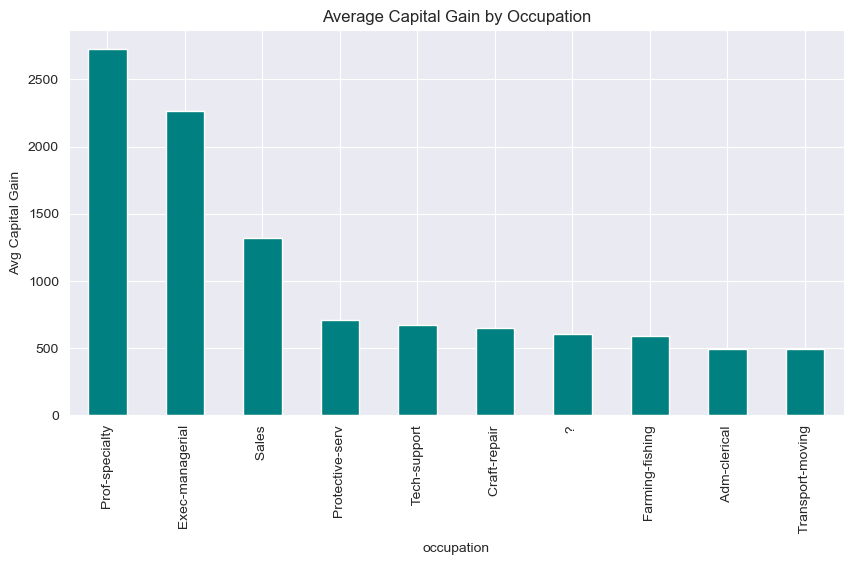

In [158]:
plt.figure(figsize=(10,5))
cap_gain.plot(kind='bar', color='teal')
plt.title("Average Capital Gain by Occupation")
plt.ylabel("Avg Capital Gain")
plt.show()

The chart shows the average capital gain by occupation. "Prof-specialty" and "Exec-managerial" occupations have the highest average capital gains, significantly higher than other occupations like "Sales" and "Protective-serv." Occupations such as "Farming-fishing," "Adm-clerical," and "Transport-moving" have much lower average capital gains, indicating a disparity between high and low-earning jobs in terms of capital gains.

11.EDUCATION VS INMCOME HORIZONTAL BAR CHART

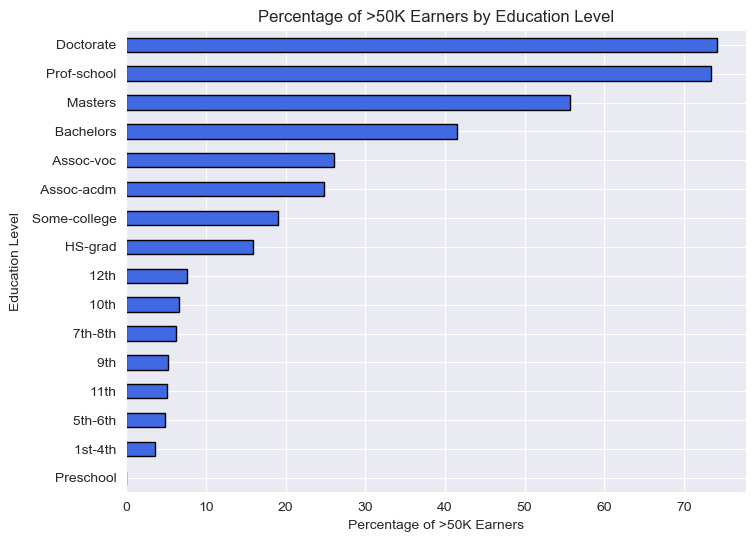

In [162]:
edu_income = df.groupby(['education','income']).size().unstack(fill_value=0)
edu_income_pct = edu_income.div(edu_income.sum(axis=1), axis=0) * 100

high_income_col = edu_income_pct.columns[1]

edu_income_pct.sort_values(by=high_income_col, inplace=True)

edu_income_pct[high_income_col].plot(kind="barh", figsize=(8,6), color="royalblue", edgecolor="k")
plt.title("Percentage of >50K Earners by Education Level")
plt.xlabel("Percentage of >50K Earners")
plt.ylabel("Education Level")
plt.show()

INTERPRETATION

The chart shows the percentage of individuals earning more than 50K annually, grouped by education level.

People with Doctorates and Professional-school degrees have the highest proportion of high earners, around 70–75%.

Those with Master’s and Bachelor’s degrees also show strong representation, with 40–55% earning above $50K.

Associate degrees  fall in the 25–30% range.

Individuals with Some college or High school graduation have lower chances (15–20%).

People with less than a high school education (12th grade and below, preschool, 1st–4th, etc.) have very low chances (<10%) of earning above 50K.

INSIGHTS

Education strongly influences income potential: Higher degrees significantly increase the likelihood of being in the >50K income bracket.

Threshold effect at Bachelor’s level: The probability of earning more than $50K rises sharply starting from a Bachelor’s degree.

Vocational/Associate degrees provide some income mobility but are still far behind university-level degrees.

High school or below locks most individuals into lower-income brackets, suggesting limited upward mobility without further education.

Doctorates & professional degrees  show the most economic payoff, with the majority of individuals surpassing the 50K threshold.

12. OCCUPATION VS INCOME - HEAT MAP

In [163]:
occ_income = df.groupby(['occupation','income']).size().unstack(fill_value=0)

In [164]:
occ_income

income,<=50K,>50K
occupation,,
?,1652,191
Adm-clerical,3261,507
Armed-Forces,8,1
Craft-repair,3165,929
Exec-managerial,2097,1968
Farming-fishing,877,115
Handlers-cleaners,1283,86
Machine-op-inspct,1751,249
Other-service,3154,137


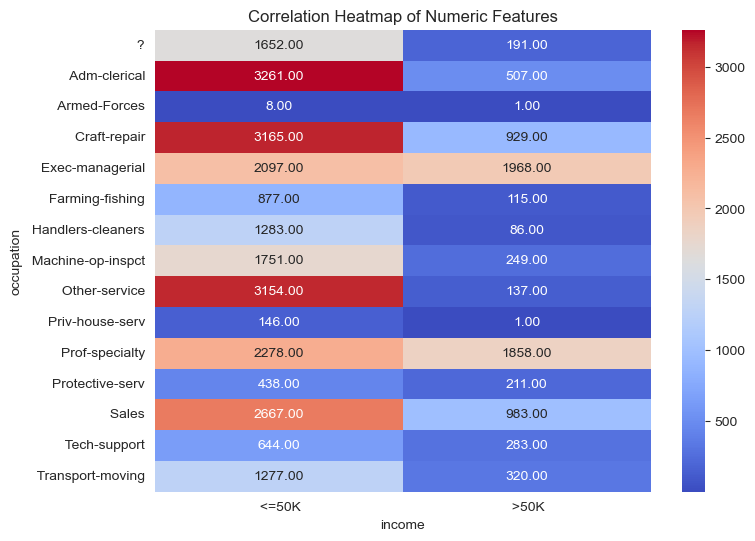

In [169]:
plt.figure(figsize=(8,6))
sns.heatmap(occ_income, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

INTERPRETATION

The heatmap shows how different occupations are distributed between two income groups:

<=50K (left column, red shades indicate higher counts). >50K (right column, blue shades indicate lower counts).

Adm-clerical, Craft-repair, Other-service, and Sales occupations have much higher counts in <=50K income, meaning most workers in these roles earn below $50K.

Exec-managerial and Prof-specialty occupations are the most balanced, with relatively high representation in both <=50K and >50K groups. These roles have greater chances of crossing into >50K earnings.

Protective-serv, Farming-fishing, Handlers-cleaners, and Priv-house-serv are overwhelmingly concentrated in <=50K with very few high earners.

Tech-support and Transport-moving also lean heavily toward <=50K, though some >50K earners exist.

Armed-Forces representation is minimal in both categories.

INSIGHTS

Executive/managerial and professional specialty roles have the highest share of >50K earners, while service, clerical, and labor-intensive jobs  are overwhelmingly in the <=50K group, showing a clear divide between skill-intensive and low-skill occupations.

FINAL SUMMARY

This project analyzes the Census Income dataset to understand how demographic and employment-related factors influence whether an individual earns ≤50K or >50K annually. After loading and cleaning the data, duplicates were removed, missing column names were fixed, and data types were corrected. A new feature, net capital (capital gain minus capital loss), was created to capture financial standing more effectively. Exploratory analysis included studying age distribution across workclasses, average working hours by education level, and the relationship between workclass and age. Visualizations revealed key insights such as differences in workload across employment sectors, the positive influence of higher education on income, and distinct age patterns among workclasses. The analysis shows that income levels are shaped by a mix of demographic (age, gender, race) and work-related (education, occupation, hours worked, workclass, net capital) factors. Overall, the project evolved from examining income inequality to also classifying income groups, uncovering socioeconomic patterns that highlight the key drivers of higher income.

POTENTIAL RECOMMENDATION 

Based on the analysis of the Census Income dataset, several recommendations can be made to address income disparities and improve socioeconomic outcomes. Since education strongly influences income levels, expanding access to higher education and skill development programs can help individuals transition into better-paying roles. The findings also highlight workload imbalances across workclasses, particularly in the private sector, suggesting the need for fair labor policies and better workload management. Younger workers, who are often concentrated in lower-paying workclasses, would benefit from targeted career development opportunities, mentorship, and training programs to enhance their income potential. In addition, addressing gender and occupational disparities through equal pay initiatives and inclusive workplace policies can further reduce inequality. Financial literacy programs can also empower individuals to manage capital gains and losses more effectively, contributing to improved financial stability. Overall, these insights provide a data-driven foundation for governments, organizations, and policymakers to design targeted interventions that promote income equality, fair employment practices, and long-term economic growth.

END OF THE REPORT 

THANK YOU